In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load the ECG dataset
ecg_dataset = pd.read_csv("ecg.csv")

In [3]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(ecg_dataset.values)
y = X  # Autoencoder input and output are the same

X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

In [4]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

In [5]:
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
])

In [6]:
decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Use linear activation for reconstruction
])

In [7]:
autoencoder = models.Sequential([
    encoder,
    decoder
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
125/125 [==============================] - 3s 4ms/step - loss: 0.5921
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.3232
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2660
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2333
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2176
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2068
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1930
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1806
Epoch 9/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1751
Epoch 10/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1616
Epoch 11/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1545
Epoch 12/100
125/125 [==============================] - 0s 4ms/step - loss: 0.1500
Epoch 13/100


In [8]:
# Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

32/32 [==============================] - 0s 3ms/step


In [9]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

In [10]:
# Predict anomalies
anomalies = mse > threshold

In [11]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


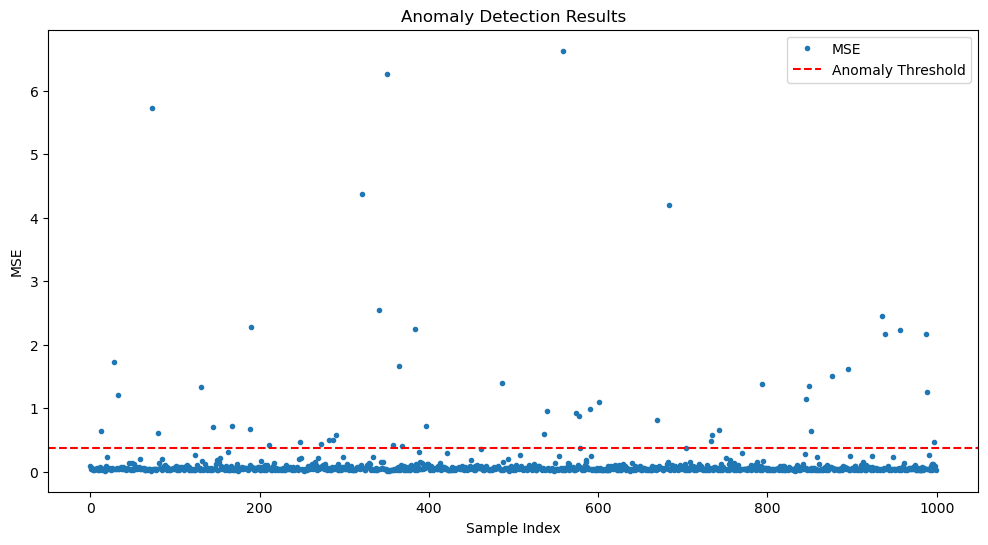

In [12]:
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

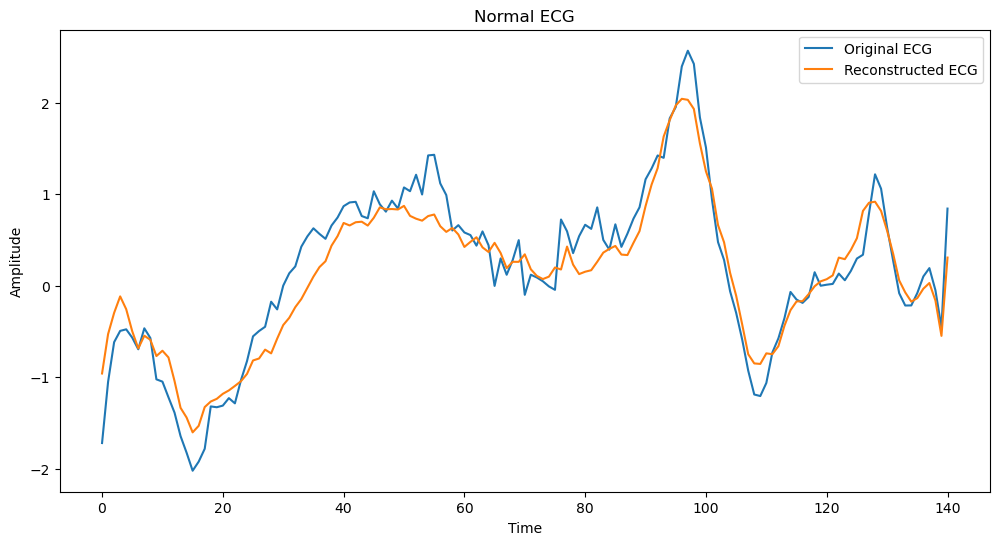

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [14]:
# listing the index of anomalies in X_test
anomalies_index = []
for index, anomaly in enumerate(anomalies):
    if anomaly == True :
        anomalies_index.append(index)

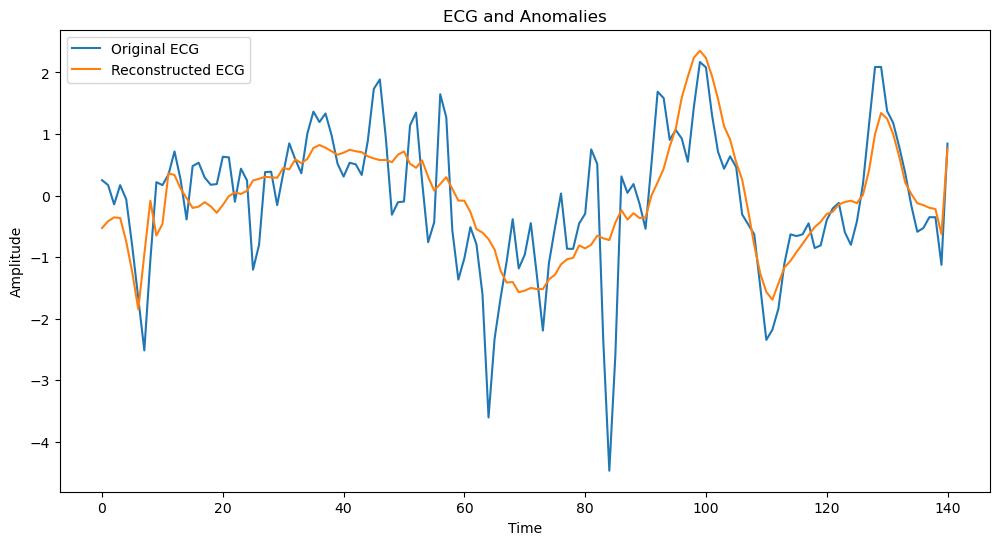

In [15]:
n = 4
anomaly_index = anomalies_index[n]
plt.figure(figsize=(12, 6))
plt.plot(X_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()

In [16]:
# Evaluate the model
y_true = np.zeros(len(X_test))
print("Confusion Matrix:")
print(confusion_matrix(anomalies, anomalies))

print("\nClassification Report:")
print(classification_report(anomalies, anomalies))

Confusion Matrix:
[[950   0]
 [  0  50]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [17]:
import seaborn as sns

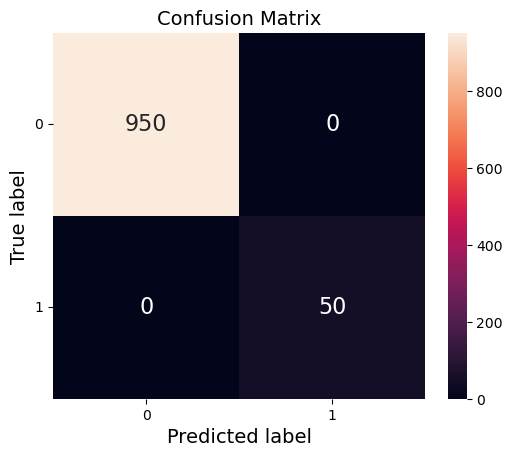

In [18]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()